# Western Governors University D208
### Logistic Regression
#### Shane Boyce

## INTRODUCTION
As a data analyst, you will assess continuous data sources for their relevance to specific research questions throughout your career.



In your previous coursework, you have performed data cleaning and exploratory data analysis on your data. You have seen basic trends and patterns and now can start building more sophisticated statistical models. In this course, you will use and explore both multiple regression and logistic regression models and their assumptions.



You will then review the data dictionary related to the raw data file you have chosen, and prepare the data set file for logistic regression modeling. The organizations connected with the given data sets for this task seek to analyze their operations and have collected variables of possible use to support decision-making processes. You will analyze your chosen data set using logistic regression modeling, create visualizations, and deliver the results of your analysis. It is recommended that you use the cleaned data set from your previous course.



In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import churn_helper as ch

#magic words and settings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# data prep
logdf = pd.read_csv('churn_clean.csv')
ch.churnauotclean(logdf)

In [3]:
logdf.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


## Part I: Research Question

### A.  Describe the purpose of this data analysis by doing the following:

The purpose of this analysis will be to determine which, if any, binary and categorical features contribute to predicting `Churn`. The primary motive of the telecommunications project was to use the supplied data to reduce customer turnover due to a separate un-included analysis claiming retention was 10 times more valuable than on-boarding new customers. The following null and alternate hypothesis will be used:

$H$<sub> 0 </sub>: $B$<sub>1</sub> = $B$<sub>2</sub> = ... $B$<sub>k</sub> = 0
$H$<sub> 1 </sub>: $B$<sub>1</sub> = $B$<sub>2</sub> = ... $B$<sub>k</sub> ≠ 0

$a$ = 0.05

## Part II: Method Justification

### B.  Describe logistic regression methods by doing the following:

1. Summarize the assumptions of a logistic regression model.

Logistic regression assumes a <b>response variable>/b> is binary (yes/no, 0/1) but the predictor variables can be discrete, continuous or categorical. Observations in the dataset are independent of other observations in the data. This regression also assumes no sever (VIF > 5) multicolinearity between features and that there are no extreme outliers. Logistic regression also assumes a linear relationship between the logit/explanatory variables and the response variable. Finally, logistic regression requires a sufficient sample size.

3. Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

Python is the most popular programming language according to the Tiobe Index (TIOBE Software BV, 2022). Python also is well known for its extensive packages for data analysis and machine learning. For Logistic Regression there is Statsmodels.Api, Pingouin, Scikit-learn and many others. Python also has well known libraries for manipulating and cleaning data such as Tablespace and Pandas. This analysis is being done in a Jupyter Notebook, a standard in data science due to its flexibility with markdown and text blocks.

5. Explain why logistic regression is an appropriate technique to analyze the research question summarized in Part I.

Due to the response variable, `Churn`, being binary classification, logistic regression is the most appropriate tool to analyze other features effects.



## Part III: Data Preparation

### C.  Summarize the data preparation process for logistic regression by doing the following:

1. Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

Data was previously cleaned with regard to missing data and standardization practices. Further data prep will be to drop all numeric and label (I.E. `Lat`.`Long`,`Zip`) columns except our binary categories to compare them against churn. While logistic regression can use all the numeric features of the dataset (Starmer, 2018), the continuous variables were already assessed with linear regression. By finding the features that contribute to churn the speed of processing will be faster with less risk of over-fitting the dataset and allow an easier reduction of features that do not contribute information to `Churn`. Dummy variables via 1-hot encoding will be created for the categories regarding `Contract`, `InternetService` and `PaymentMethod`. An `Intercept` is added as a standard practice though it is feasible this analysis could be performed without this practice as it is possible for an all 0/"no" for all features (Nau).


In [4]:
#subset columns to only the necessary binary and categorical features
dflog = logdf[[ 'Churn', 'Marital','Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
                'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling', 'PaymentMethod']]

dflog['Intercept'] = 1

dflog.head()

,Churn,Marital,Gender,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Intercept
0,0,Widowed,Male,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),1
1,1,Married,Female,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1
2,0,Widowed,Female,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),1
3,0,Married,Male,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,1
4,1,Separated,Male,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1


In [5]:
#verifying initial shape
dflog.shape

(10000, 19)

In [6]:
# Getting variables so regression can be used on the categorical features below
dflog = pd.get_dummies(dflog, columns=['Gender','Contract','InternetService','PaymentMethod', 'Marital'])


In [7]:
# drop non columns, this is the default category for all 0's in other categories.
dflog.drop(['InternetService_None', 'Marital_Never Married'], axis=1, inplace=True)


In [8]:
dflog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Churn                                   10000 non-null  int64
 1   Techie                                  10000 non-null  int64
 2   Port_modem                              10000 non-null  int64
 3   Tablet                                  10000 non-null  int64
 4   Phone                                   10000 non-null  int64
 5   Multiple                                10000 non-null  int64
 6   OnlineSecurity                          10000 non-null  int64
 7   OnlineBackup                            10000 non-null  int64
 8   DeviceProtection                        10000 non-null  int64
 9   TechSupport                             10000 non-null  int64
 10  StreamingTV                             10000 non-null  int64
 11  StreamingMovies 

In [9]:
dflog.shape

(10000, 30)

Note that data does not have to be scaled because each variable, including the category dummies are now same scale binary.

3. Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.


In [10]:
dflog.describe()

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Intercept,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.265000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,1.0,0.502500,0.474400,0.023100,0.545600,0.210200,0.244200,0.346300,0.440800,0.222900,0.208300,0.339800,0.22900,0.209200,0.191100,0.201400,0.202700
std,0.441355,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,0.0,0.500019,0.499369,0.150229,0.497941,0.407471,0.429633,0.475814,0.496508,0.416213,0.406113,0.473665,0.42021,0.406758,0.393187,0.401066,0.402031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [11]:
dflog[dflog['Churn'] == 0].describe()

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Intercept,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
count,7350.0,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.0,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,0.0,0.152925,0.480952,0.299864,0.911293,0.421361,0.361497,0.435510,0.421769,0.369524,0.423810,0.402177,0.586122,1.0,0.510612,0.465986,0.023401,0.465578,0.244218,0.290204,0.319592,0.458231,0.227347,0.209932,0.331293,0.231429,0.209388,0.192925,0.197823,0.200136
std,0.0,0.359940,0.499671,0.458229,0.284340,0.493811,0.480467,0.495857,0.493876,0.482709,0.494195,0.490371,0.492561,0.0,0.499921,0.498876,0.151185,0.498848,0.429652,0.453887,0.466350,0.498286,0.419147,0.407288,0.470710,0.421774,0.406899,0.394622,0.398385,0.400129
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
dflog[dflog['Churn'] == 1].describe()

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Intercept,Gender_Female,Gender_Male,Gender_Nonbinary,Contract_Month-to-month,Contract_One year,Contract_Two Year,InternetService_DSL,InternetService_Fiber Optic,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed
count,2650.0,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.0,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,1.0,0.209434,0.490189,0.296981,0.893962,0.570189,0.346792,0.492453,0.485283,0.390189,0.684528,0.729811,0.593962,1.0,0.480000,0.497736,0.022264,0.767547,0.115849,0.116604,0.420377,0.392453,0.210566,0.203774,0.363396,0.222264,0.208679,0.186038,0.211321,0.209811
std,0.0,0.406981,0.499998,0.457014,0.307944,0.495142,0.476039,0.500037,0.499878,0.487885,0.464791,0.444141,0.491184,0.0,0.499694,0.500089,0.147569,0.422476,0.320104,0.321008,0.493713,0.488389,0.407788,0.402879,0.481068,0.415846,0.406441,0.389211,0.408322,0.407251
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Above is posted the summary statistics of the entire logistic dataset and the subsets for churning and not churning. Since every item is binary, the only useful summary statistic is the mean for each feature.

In [13]:
for col in logdf:
    if col == 'Churn':
        print(f'{col} rate is {dflog[col].mean() * 100}% of customers in this dataset.\n\n')
    else:
        try:
            print(f'{col} averages overall {round(dflog[col].mean(), 4) * 100}%.')
            print(f'For non-churning customers the average is {round(dflog[col][dflog["Churn"] == 0].mean(), 4) * 100}%.')
            print(f'For churning customers the average is {round(dflog[col][dflog["Churn"] == 1].mean(), 4) * 100}%.\n')
        except Exception:
            pass



Churn rate is 26.5% of customers in this dataset.


Techie averages overall 16.79%.
For non-churning customers the average is 15.290000000000001%.
For churning customers the average is 20.94%.

Port_modem averages overall 48.339999999999996%.
For non-churning customers the average is 48.1%.
For churning customers the average is 49.02%.

Tablet averages overall 29.909999999999997%.
For non-churning customers the average is 29.99%.
For churning customers the average is 29.7%.

Phone averages overall 90.67%.
For non-churning customers the average is 91.13%.
For churning customers the average is 89.4%.

Multiple averages overall 46.08%.
For non-churning customers the average is 42.14%.
For churning customers the average is 57.02%.

OnlineSecurity averages overall 35.76%.
For non-churning customers the average is 36.15%.
For churning customers the average is 34.68%.

OnlineBackup averages overall 45.06%.
For non-churning customers the average is 43.55%.
For churning customers the average is

4. Explain the steps used to prepare the data for the analysis, including the annotated code.

 4a. Dataset was loaded in, binary categories cleaned to 0/1.
 4b. Dataframe was paired down to categorical and binary features other than location fields and identification labels.
 4c. One-Hot Encoding was used on the labelled features.
 4d. Null columns were dropped (such as `InternetService_None`) as they represent default 0 states of other features and create noise in the analysis.


6. Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.


Univariate count plots and then split countplots by churn plotted below:

In [14]:
NoChurn = dflog[dflog['Churn'] == 0]
Churn = dflog[dflog['Churn'] == 1]



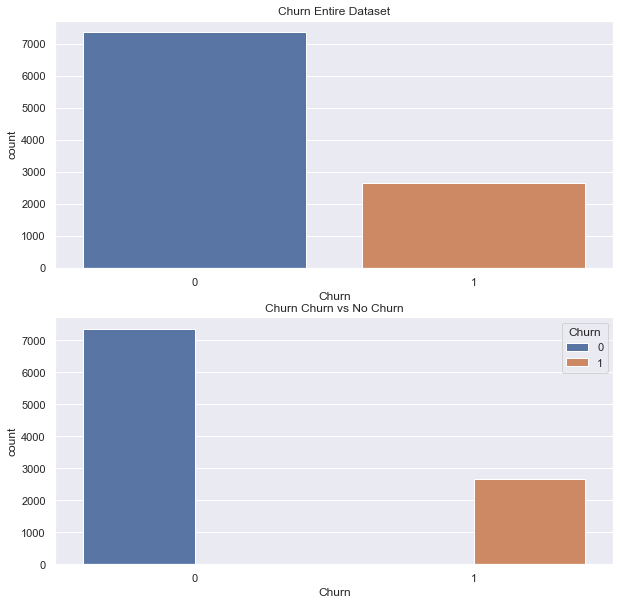

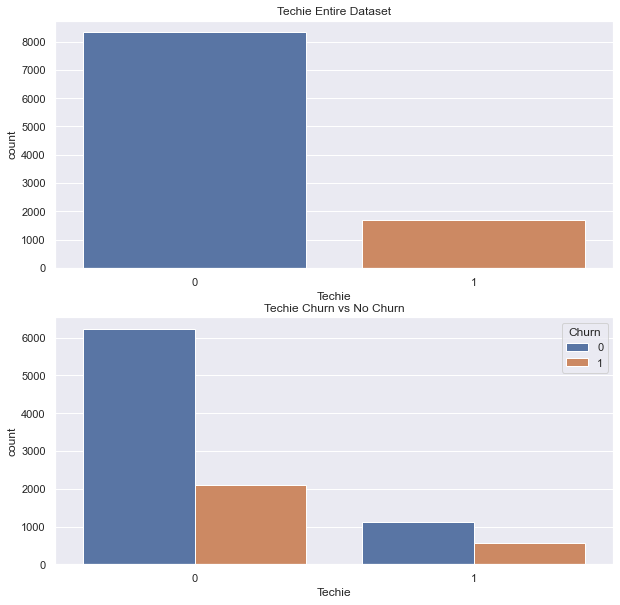

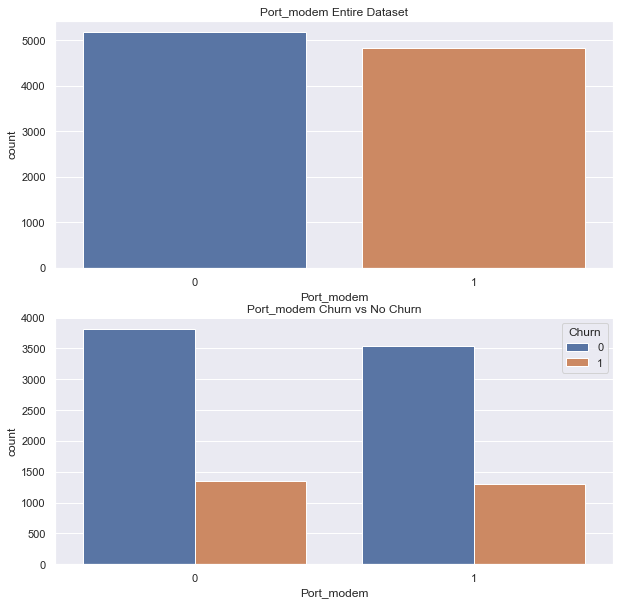

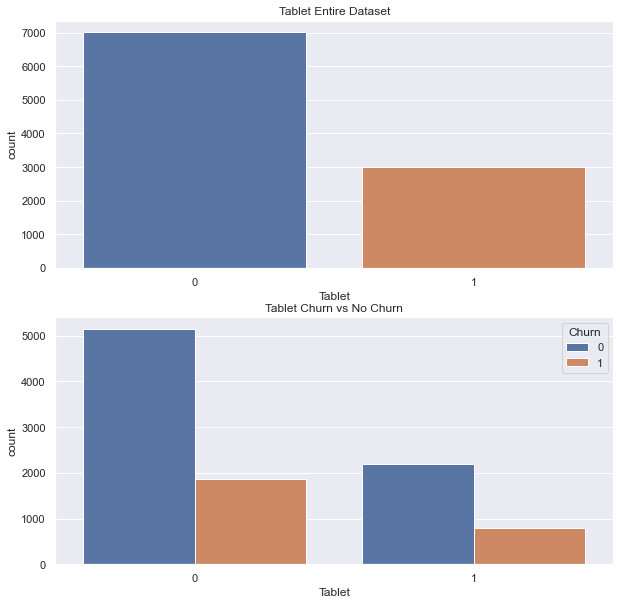

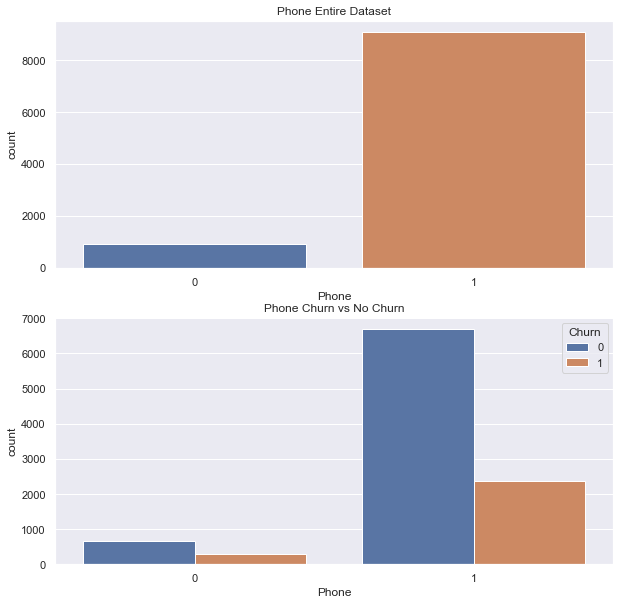

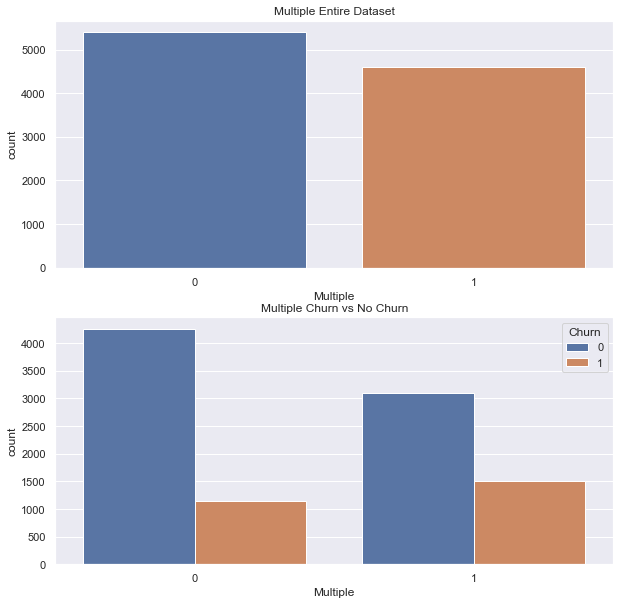

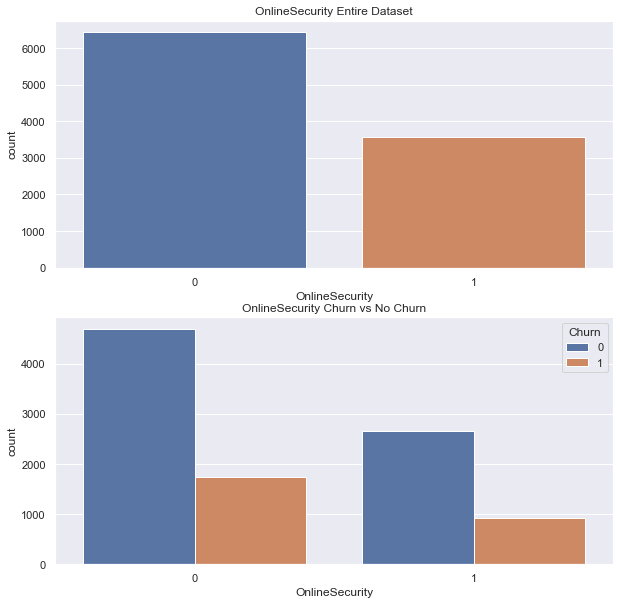

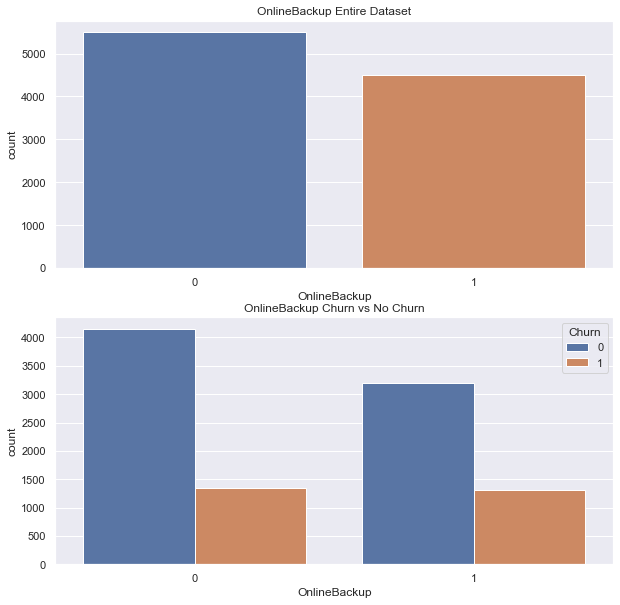

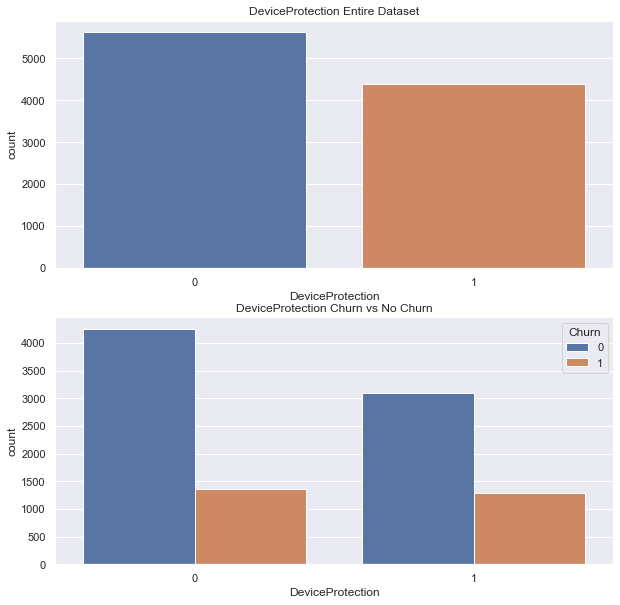

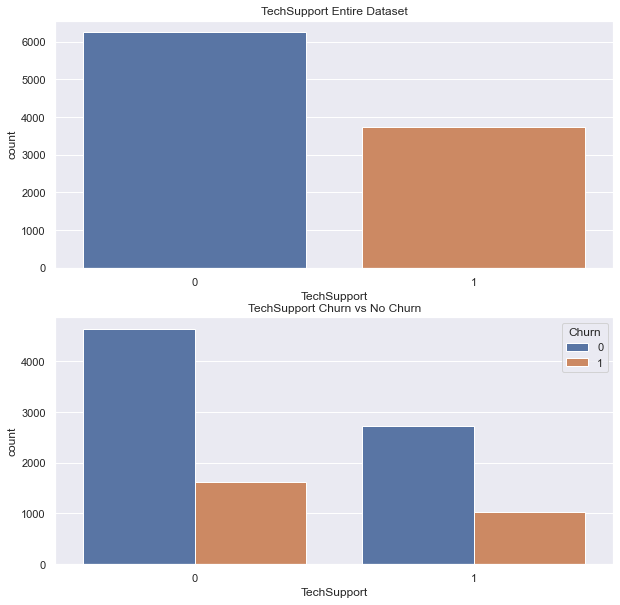

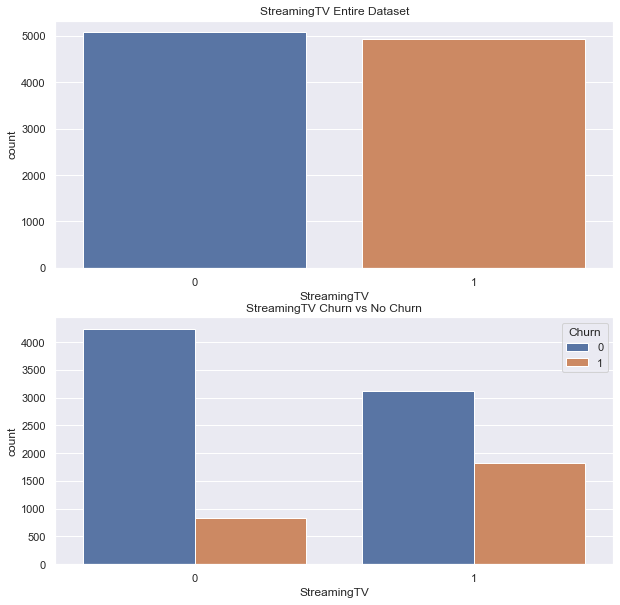

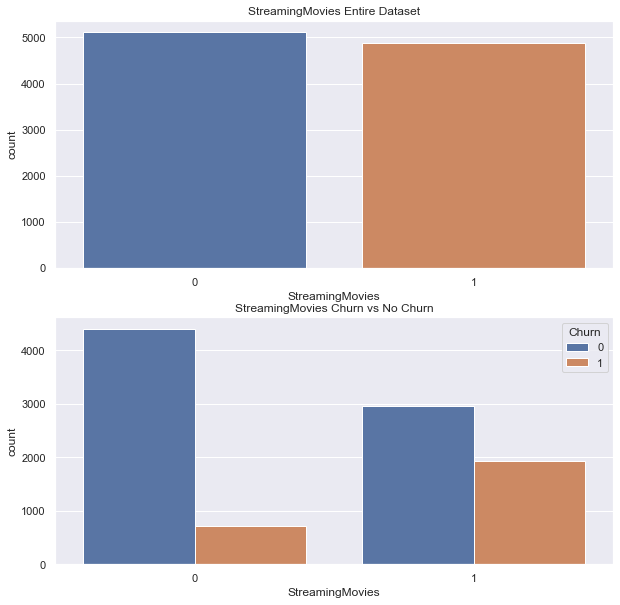

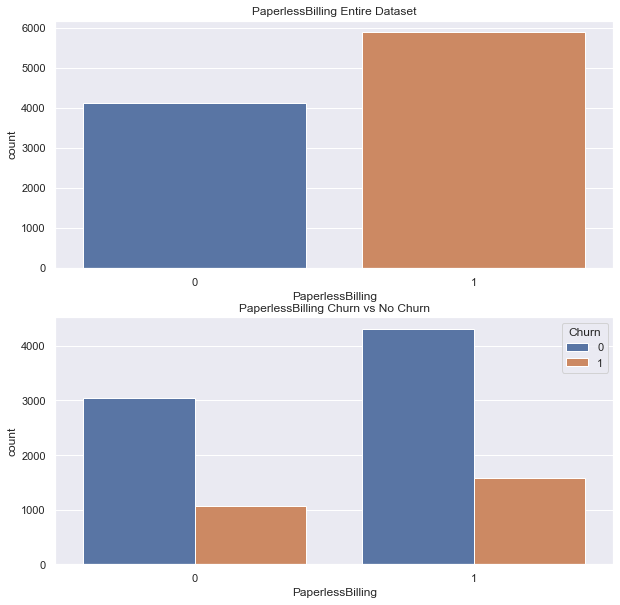

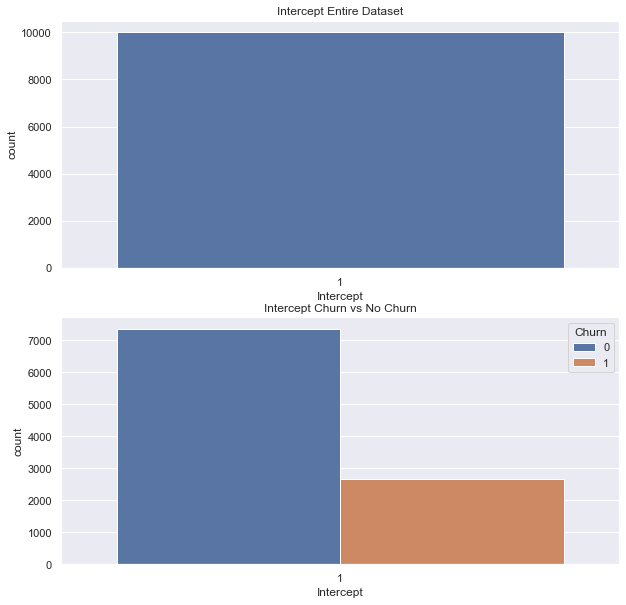

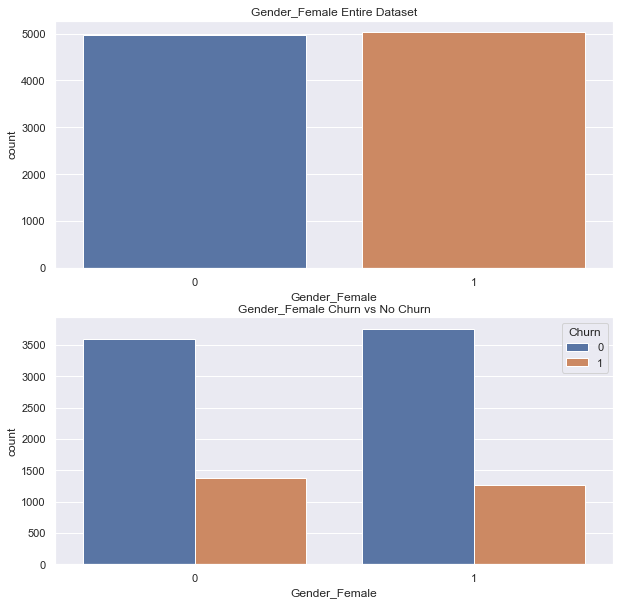

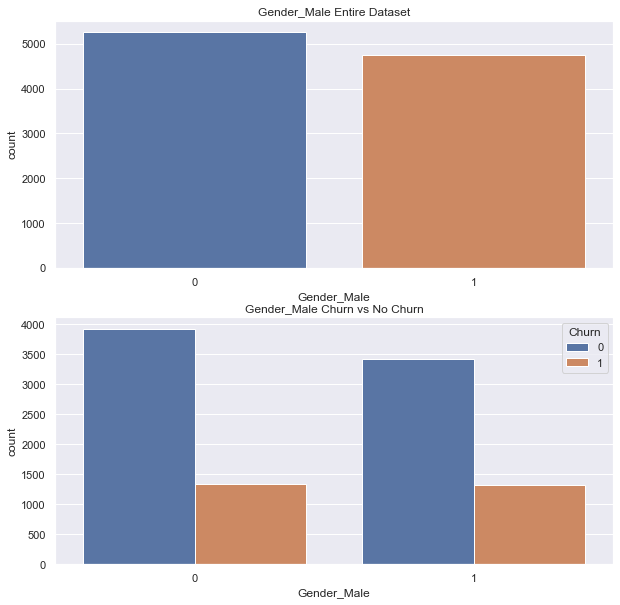

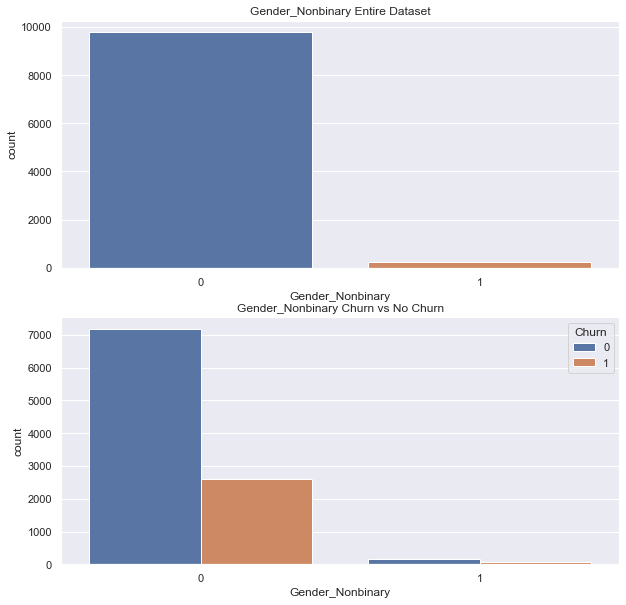

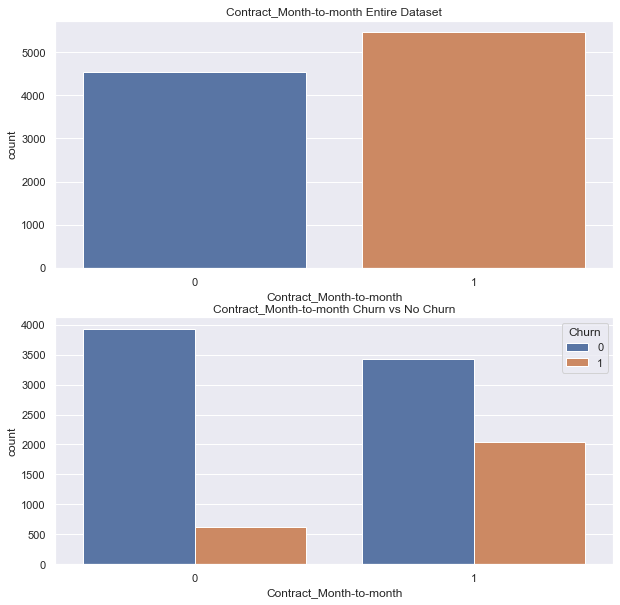

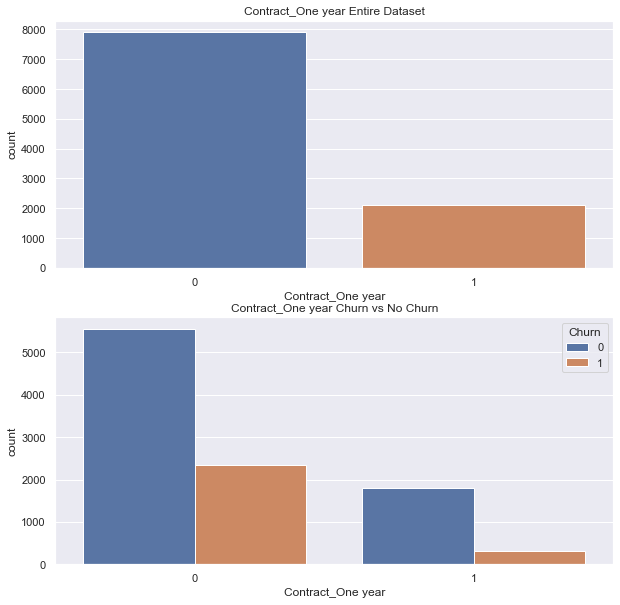

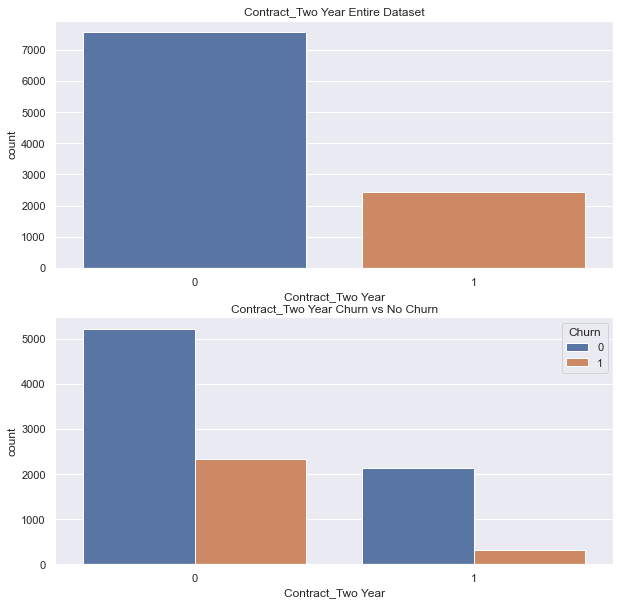

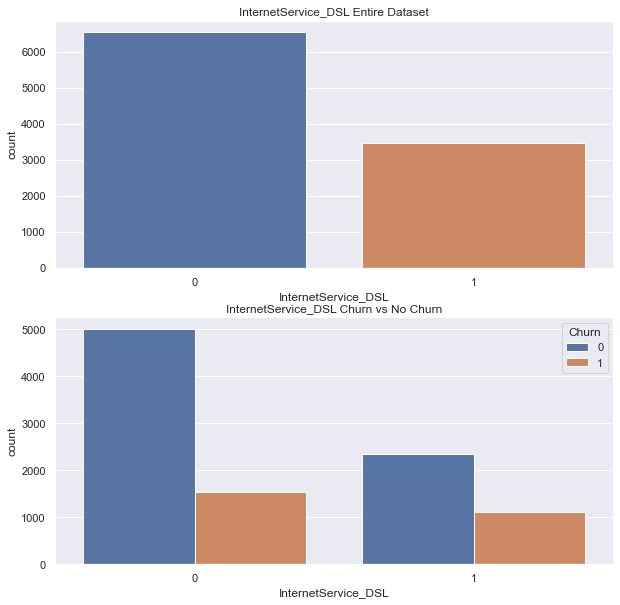

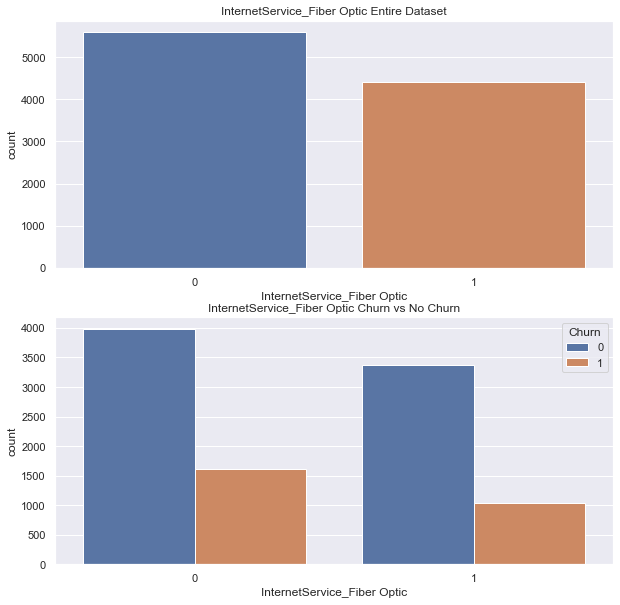

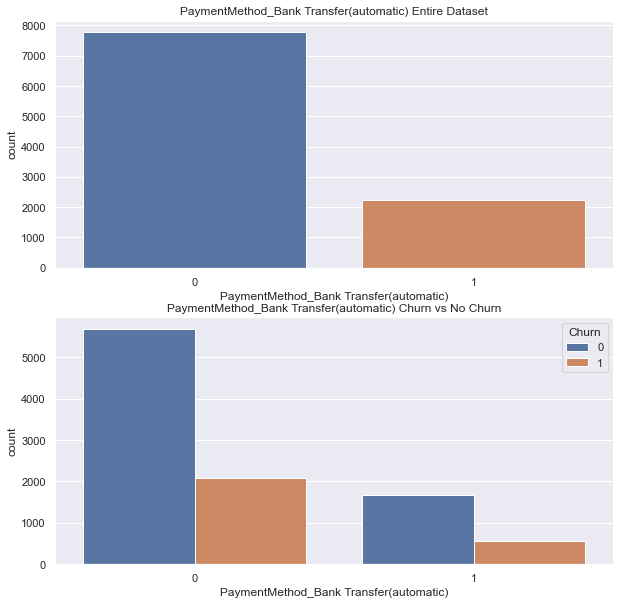

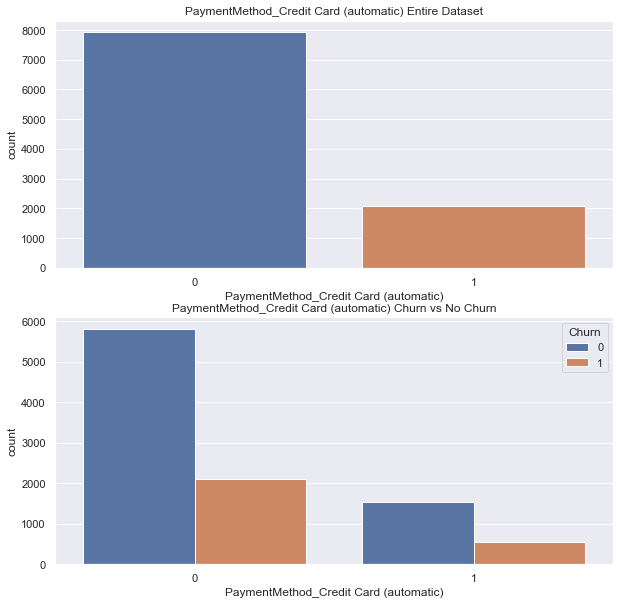

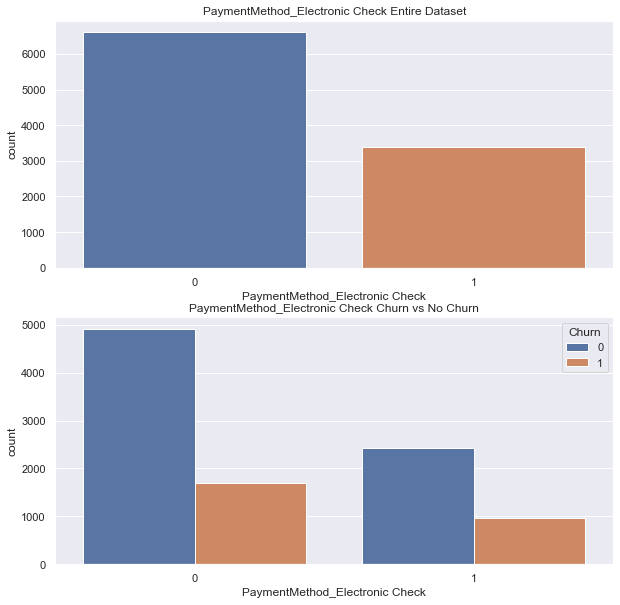

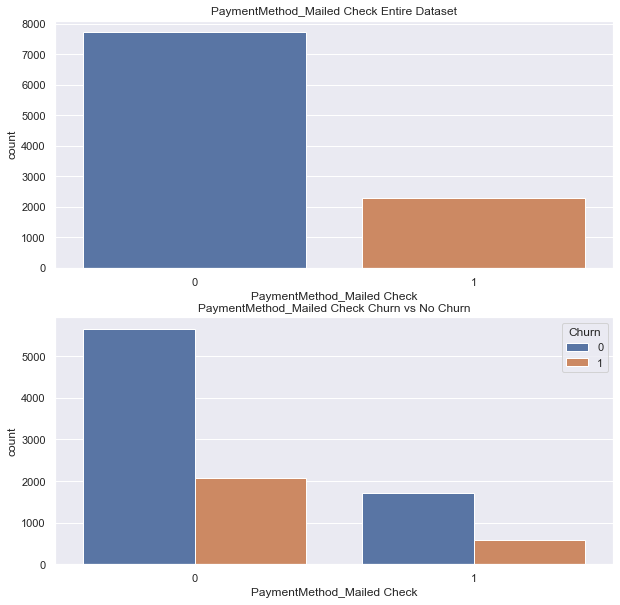

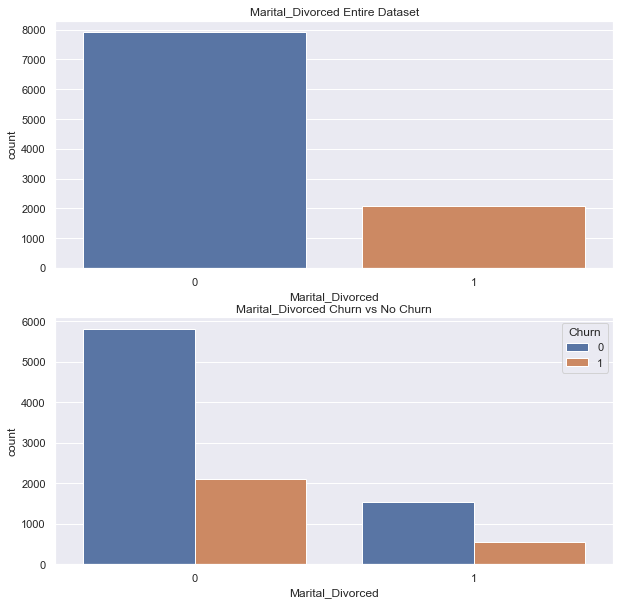

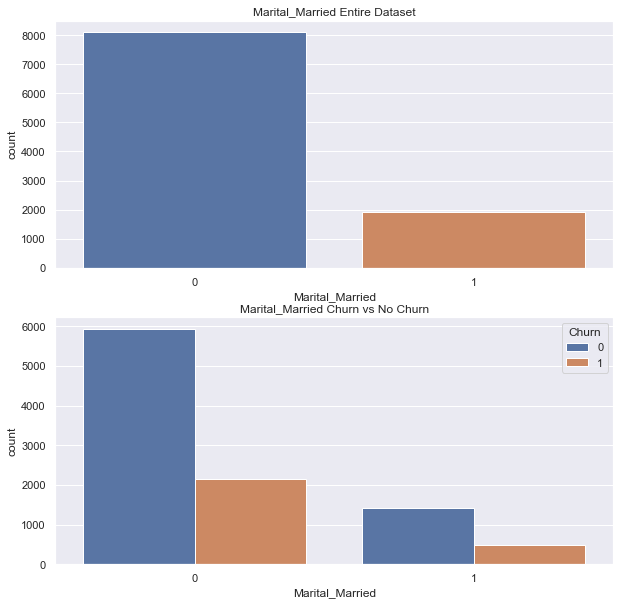

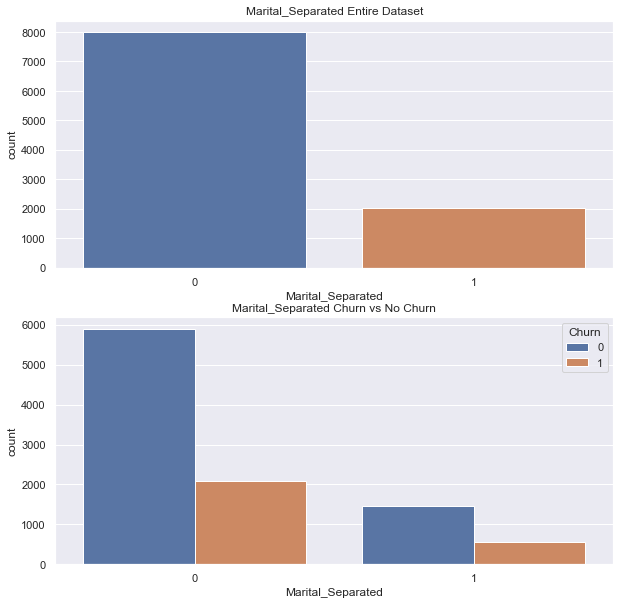

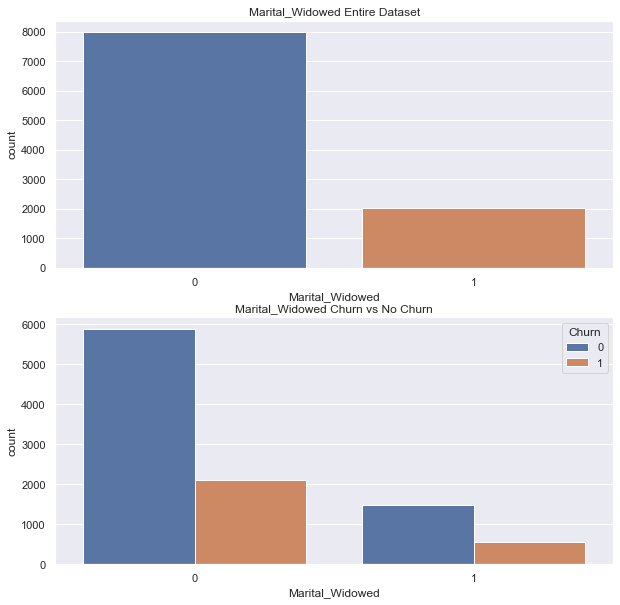

In [15]:
for col in dflog:
    sns.set(style="darkgrid")
    fig, ax =plt.subplots(2, figsize=(10, 10))
    sns.countplot(data=dflog, x=col, ax=ax[0]).set(title=f'{col} Entire Dataset')
    sns.countplot(data=dflog, x=col, hue='Churn', ax=ax[1]).set(title=f'{col} Churn vs No Churn')
    plt.show()







7. Provide a copy of the prepared data set.

In [16]:
dflog.to_csv('D208LogReg.csv')

## Part IV: Model Comparison and Analysis

### D.  Compare an initial and a reduced logistic regression model by doing the following:

1.  Construct an initial logistic regression model from all predictors that were identified in Part C2


In [17]:
# setting independent and dependent variables
indvars = dflog.columns.tolist()
indvars.remove('Churn')

Xtrain = dflog[indvars]
ytrain = dflog[['Churn']]

In [18]:
# Fit model with standardized process
log_reg = sm.Logit(ytrain, Xtrain).fit()

pvs = round(log_reg.pvalues, 3).to_dict()
coeffs = round(log_reg.params, 3).to_dict()

Optimization terminated successfully.
         Current function value: 0.432349
         Iterations 9


In [19]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           25
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                  0.2523
Time:                        17:23:38   Log-Likelihood:                -4323.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Techie                                     0.5254      0.069      7.633      0.000       0.391       0.660
Port_modem                                 0.03

In [20]:
pvs, coeffs

({'Techie': 0.0,
  'Port_modem': 0.485,
  'Tablet': 0.421,
  'Phone': 0.119,
  'Multiple': 0.0,
  'OnlineSecurity': 0.06,
  'OnlineBackup': 0.0,
  'DeviceProtection': 0.0,
  'TechSupport': 0.005,
  'StreamingTV': 0.0,
  'StreamingMovies': 0.0,
  'PaperlessBilling': 0.134,
  'Intercept': 1.0,
  'Gender_Female': 1.0,
  'Gender_Male': 1.0,
  'Gender_Nonbinary': 1.0,
  'Contract_Month-to-month': 1.0,
  'Contract_One year': 1.0,
  'Contract_Two Year': 1.0,
  'InternetService_DSL': 0.0,
  'InternetService_Fiber Optic': 1.0,
  'PaymentMethod_Bank Transfer(automatic)': 1.0,
  'PaymentMethod_Credit Card (automatic)': 1.0,
  'PaymentMethod_Electronic Check': 1.0,
  'PaymentMethod_Mailed Check': 1.0,
  'Marital_Divorced': 0.751,
  'Marital_Married': 0.76,
  'Marital_Separated': 0.094,
  'Marital_Widowed': 0.025},
 {'Techie': 0.525,
  'Port_modem': 0.037,
  'Tablet': -0.047,
  'Phone': -0.14,
  'Multiple': 0.86,
  'OnlineSecurity': -0.106,
  'OnlineBackup': 0.332,
  'DeviceProtection': 0.317,
  'T

2. Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

Using the alpha levels from before, any values that reject the null with p < $a$ will be kept. There are a few variables with NaN values due to Statsmodels handling of separation. Without using another modeling tool, no information can be gathered from the `Gender` columns and will be dropped.


The non reduced model logistic equation is as follows:
`Churn` = 0.525[Techie] + 0.037[Port_modem] + -0.047[Tablet] + -0.14[Phone] + 0.86[Multiple] + -0.106[OnlineSecurity] + 0.332[OnlineBackup] + 0.317[DeviceProtection] + 0.156[TechSupport] + 1.48[StreamingTV] + 1.766[StreamingMovies] + 0.081[PaperlessBilling] + -2.345[Intercept] + -0.826[Gender_Female] + -0.669[Gender_Male] + -0.851[Gender_Nonbinary] + 0.388[Contract_Month-to-month] + -1.29[Contract_One year] + -1.443[Contract_Two Year] + 0.606[InternetService_DSL] + 0.0[InternetService_Fiber Optic] + -0.685[PaymentMethod_Bank Transfer(automatic)] + -0.619[PaymentMethod_Credit Card (automatic)] + -0.44[PaymentMethod_Electronic Check] + -0.601[PaymentMethod_Mailed Check] + 0.027[Marital_Divorced] + 0.027[Marital_Married] + 0.143[Marital_Separated] + 0.191[Marital_Widowed] +

In [21]:
significant_list = ["Intercept"]
for key, val in pvs.items():
    if val < .05:
        significant_list.append(key)
        print(f'The feature {key} is statistically significant in the model with a P‑value of {val}')
print(f'The following features will be used for the reduced model: {significant_list} + an intercept')



The feature Techie is statistically significant in the model with a P‑value of 0.0
The feature Multiple is statistically significant in the model with a P‑value of 0.0
The feature OnlineBackup is statistically significant in the model with a P‑value of 0.0
The feature DeviceProtection is statistically significant in the model with a P‑value of 0.0
The feature TechSupport is statistically significant in the model with a P‑value of 0.005
The feature StreamingTV is statistically significant in the model with a P‑value of 0.0
The feature StreamingMovies is statistically significant in the model with a P‑value of 0.0
The feature InternetService_DSL is statistically significant in the model with a P‑value of 0.0
The feature Marital_Widowed is statistically significant in the model with a P‑value of 0.025
The following features will be used for the reduced model: ['Intercept', 'Techie', 'Multiple', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetS

4. Provide a reduced logistic regression model.

In [22]:
Xtrain = dflog[significant_list]

log_redreg = sm.Logit(ytrain, Xtrain).fit()

pvs = round(log_redreg.pvalues, 3).to_dict()
coeffs = round(log_redreg.params, 3).to_dict()

Optimization terminated successfully.
         Current function value: 0.484172
         Iterations 6


In [23]:
np.exp(log_redreg.params)

Intercept              0.028400
Techie                 1.591342
Multiple               2.030546
OnlineBackup           1.332827
DeviceProtection       1.318695
TechSupport            1.139884
StreamingTV            3.517754
StreamingMovies        4.749044
InternetService_DSL    1.667137
Marital_Widowed        1.101912
dtype: float64

In [24]:
print(log_redreg.summary2())

                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.163    
Dependent Variable:   Churn             AIC:               9703.4392
Date:                 2022-08-14 17:23  BIC:               9775.5427
No. Observations:     10000             Log-Likelihood:    -4841.7  
Df Model:             9                 LL-Null:           -5782.2  
Df Residuals:         9990              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       6.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           -3.5614   0.0838 -42.5152 0.0000 -3.7255 -3.3972
Techie               0.4646   0.0646   7.1894 0.0000  0.3379  0.5912
Multiple             0.7083   0.0506  13.9964 0.0000  0.6091 

In [25]:
logoddsdf = pd.DataFrame(np.exp(log_redreg.params), columns=['Log of Odds'])
logoddsdf['Probability'] = logoddsdf['Log of Odds']/(1+logoddsdf['Log of Odds'])

logoddsdf

,Log of Odds,Probability
Intercept,0.028400,0.027616
Techie,1.591342,0.614100
Multiple,2.030546,0.670026
OnlineBackup,1.332827,0.571336
DeviceProtection,1.318695,0.568723
TechSupport,1.139884,0.532685
StreamingTV,3.517754,0.778651
StreamingMovies,4.749044,0.826058
InternetService_DSL,1.667137,0.625066
Marital_Widowed,1.101912,0.524243


### E.  Analyze the data set using your reduced logistic regression model by doing the following:

1.  Explain your data analysis process by comparing the initial and reduced logistic regression models:

Variables were selected based on categorical data not used in previous analysis to determine logistic statistical relationship to `Churn`. Features were then paired down based on their P values with an %a$ = 0.05. The adjusted R<sup>2</sup> value reduced from 0.25 to 0.16. According to Domenich and McFadden (2011) an adjusted R-sqaured between 0.2 and 0.4 shows good fit. The reduced model therefore only has moderate fit. This could either be some features increase random noise or there is a better way to select features. The log odds and probabilities of the reduced model are also shown above.



2.  Provide the output and any calculations of the analysis you performed, including a confusion matrix.

Odds, Pvalues, Logg Odds and R-Sqaured analysis provided above. Below is the confusion matrix with standard accuracy related scores for the model.

Note: The output should include the predictions from the refined model you used to perform the analysis.


In [26]:
cm = log_redreg.pred_table()
cm

array([[6758.,  592.],
       [1763.,  887.]])

In [27]:
TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]

TP, TN, FP, FN

(6758.0, 887.0, 1763.0, 592.0)

In [28]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclass = 1 - accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
F1 = (2 * ((precision * recall)/(precision + recall)))


In [29]:
print(f'The accuracy of the Statsmodal reduced regression is {accuracy} with a misclassification rate of {misclass}.\n'
      f'The model has a precision positive rate of {precision}, recall/true positive rate of {recall}.\n'
      f'The specificity/true negative rate of the model is {specificity}.\n'
      f'THe harmonic mean f1=Score is {F1}')

The accuracy of the Statsmodal reduced regression is 0.7645 with a misclassification rate of 0.23550000000000004.
The model has a precision positive rate of 0.7930994014786997, recall/true positive rate of 0.9194557823129251.
The specificity/true negative rate of the model is 0.3347169811320755.
THe harmonic mean f1=Score is 0.8516161552517171


3. Provide the code used to support the implementation of the logistic regression models.
Provided in line

## Part V: Data Summary and Implications

### F.  Summarize your findings and assumptions by doing the following:

1.  Discuss the results of your data analysis, including the following elements:

•  a regression equation for the reduced model

`Churn` = -3.561[Intercept] + 0.465[Techie] + 0.708[Multiple] + 0.287[OnlineBackup] + 0.277[DeviceProtection] + 0.131[TechSupport] + 1.258[StreamingTV] + 1.558[StreamingMovies] + 0.511[InternetService_DSL] + 0.097[Marital_Widowed]

•  an interpretation of coefficients of the statistically significant variables of the model

Overall, users are less likely to churn than not but certain features that are statistically significant in the model are very likely to churn. `StreamingTV` and `StreamingMovies` for example are associated with higher churn rates. Those items may be related to service issues or compounding service issues of related features.

•  the statistical and practical significance of the model

As discussed earlier, the model has a moderate fit Adjusted McFadden R<sup>2</sup>. The model better at finding churn than not churning (recall: 91% > specificity 33%) and is overall accurate 76% of the time.

•  the limitations of the data analysis

Some limitations in this dataset include self reported data accuracy. There are some odd user data that is explored in a previous analysis on this dataset such as job titles not matching expected income. This self reported data with many anomalies, even with large sample size, introduces noise and bias into the analysis. Also, during previous cleaning, missing values for categories were set to "no"/0. While the null is a good assumption for a feature, it is not possible to judge the accuracy of these assumptions without another dataset to compare to. The equation shows a moderate fit but the quality of the data is low and could be working on bad assumptions. Another limitation is that `Churn` is not well defined. The data doesn't specify is someone is churning if they upgrade from DSL to Fiber Optic internet or if a user dropping Online Backup but keeps Streaming is a churned account.

2. Recommend a course of action based on your results.

Due to the low quality of the dataset, further analysis is needed to make accurate judgements on another similar dataset. If this dataset is going to be used, combining this regression with the multi-linear regression could help identify likely churners and adjustment to `MonthlyCost` in regards to the significant services found in this analysis can help retain customers by increasing `Tenure`. As a general strategy, reviewing the services listed above overall to improve the experience for customers either through cost, packaging, loyalty or other programs will help reduce churn/increase tenure of a customer.


## Sources

Domencich, T., &amp; McFadden, D. L. (2011, December 9). Chapter 5: Statistical Estimation of Choice Probability Functions. Urban Travel Demand: A behavioral analysis, by Tom Domencich and Daniel McFadden, 1975, North-Holland. Retrieved August 14, 2022, from https://eml.berkeley.edu/~mcfadden/travel.html

Nau, B. (n.d.). Additional notes on regression analysis -- how to interpret standard errors, T-statistics, F-ratios, and confidence intervals, how to deal with missing values and outliers, when to exclude the constant. Retrieved August 14, 2022, from https://people.duke.edu/~rnau/regnotes.htm#constant

Starmer, J. (2018, March 5). StatQuest: Logistic regression. YouTube. Retrieved August 12, 2022, from https://www.youtube.com/watch?v=yIYKR4sgzI8

TIOBE Software BV. (2022, August 3). Tiobe Index August 2022. TIOBE. Retrieved August 11, 2022, from https://www.tiobe.com/tiobe-index/

In [30]:
!jupyter nbconvert D208LogReg.ipynb --to webpdf

[NbConvertApp] Converting notebook D208LogReg.ipynb to webpdf
[NbConvertApp] ERROR | Notebook JSON is invalid: data must be valid exactly by one of oneOf definition

Failed validating <unset> in notebook:

On instance:
<unset>
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 941709 bytes to D208LogReg.pdf
